# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import accuracy_score

import tensorflow as tf
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# **Mount Drive**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Read Dataset**

In [3]:
stellar = pd.read_csv("/content/drive/MyDrive/modified_star_classification.csv")

In [4]:
stellar.head()

,Unnamed: 0,Unnamed: 0.1,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,0,0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794,5812,56354
1,1,1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136,10445,58158
2,2,2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195,4576,55592
3,3,3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346,9149,58039
4,4,4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123,6121,56187


In [5]:
stellar.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [6]:
stellar.head()

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123,6121,56187


# **Train_Test_Split**

In [7]:
x = stellar.drop(['class'], axis=1)
y = stellar['class']

In [9]:
# Normalizing approach
#scaler = StandardScaler()
#scaler.fit_transform(x)

In [8]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [10]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(72508, 10) (72508,)
(18127, 10) (18127,)


In [11]:
# Normalizing approach
scaler = StandardScaler()
scaler.fit(x_train)

x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# **ML**

### **1. KNN**


In [12]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

In [13]:
print(accuracy_score(y_test, knn_predictions))

0.9502399735201633


In [14]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     11878
           1       0.94      0.95      0.95      4251
           2       0.92      0.85      0.88      1998

    accuracy                           0.95     18127
   macro avg       0.94      0.92      0.93     18127
weighted avg       0.95      0.95      0.95     18127



In [15]:
print(confusion_matrix(y_test, knn_predictions))

[[11476   257   145]
 [  196  4055     0]
 [  286    18  1694]]


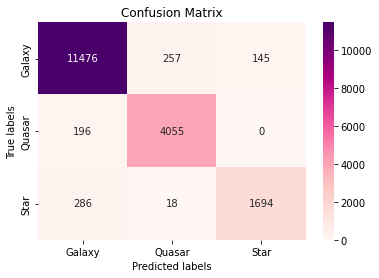

In [16]:
#Creating a confusion matrix to visualize classification results.
cm = confusion_matrix(y_test,knn_predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap= 'RdPu', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxy', 'Quasar','Star']); ax.yaxis.set_ticklabels(['Galaxy', 'Quasar','Star']);

### **2. Decsion Tree**

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_predictions = dtc.predict(x_test)

In [18]:
print(accuracy_score(y_test, dtc_predictions))

0.9622110663650908


In [19]:
print(classification_report(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11878
           1       1.00      0.99      1.00      4251
           2       0.84      0.84      0.84      1998

    accuracy                           0.96     18127
   macro avg       0.93      0.94      0.94     18127
weighted avg       0.96      0.96      0.96     18127



In [20]:
print(confusion_matrix(y_test, dtc_predictions))

[[11531    19   328]
 [   22  4229     0]
 [  315     1  1682]]


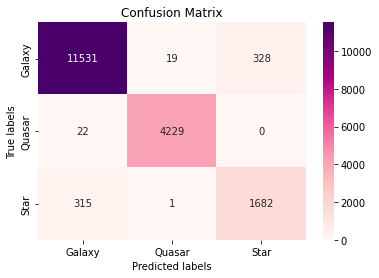

In [21]:
#Creating a confusion matrix to visualize classification results.
cm = confusion_matrix(y_test,dtc_predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap= 'RdPu', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxy', 'Quasar','Star']); ax.yaxis.set_ticklabels(['Galaxy', 'Quasar','Star']);

# **GridSearch**

### **1. KNN**

In [22]:
from sklearn.model_selection import GridSearchCV

In [31]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)

knng = KNeighborsClassifier()

grid = GridSearchCV(knng, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [32]:
grid.best_score_

0.9515087726306477

In [33]:
grid.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [34]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [35]:
y_pred = grid.predict(x_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     11878
           1       0.94      0.95      0.95      4251
           2       0.92      0.85      0.88      1998

    accuracy                           0.95     18127
   macro avg       0.94      0.92      0.93     18127
weighted avg       0.95      0.95      0.95     18127



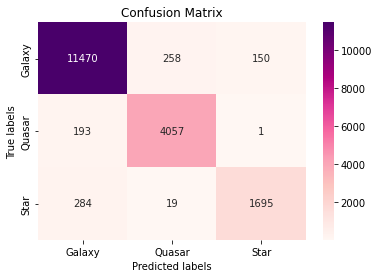

In [37]:
#Creating a confusion matrix to visualize classification results.
cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap= 'RdPu', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxy', 'Quasar','Star']); ax.yaxis.set_ticklabels(['Galaxy', 'Quasar','Star']);

### **2. Decsion Tree _ GridSearchCV**

In [27]:
param_grid_ = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
              }

In [28]:
dtcg = DecisionTreeClassifier()
grid_search = GridSearchCV(dtcg, param_grid=param_grid_, cv=10, verbose=True)

In [29]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [38]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2')

In [39]:
grid_search.best_score_

0.9608319708577652

In [40]:
y_pred_ = grid.predict(x_test)

In [41]:
print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     11878
           1       0.94      0.95      0.95      4251
           2       0.92      0.85      0.88      1998

    accuracy                           0.95     18127
   macro avg       0.94      0.92      0.93     18127
weighted avg       0.95      0.95      0.95     18127



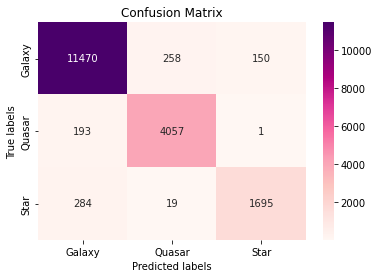

In [42]:
#Creating a confusion matrix to visualize classification results.
cm = confusion_matrix(y_test,y_pred_)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap= 'RdPu', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxy', 'Quasar','Star']); ax.yaxis.set_ticklabels(['Galaxy', 'Quasar','Star']);